In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/news-classification-dataset/News.csv')

In [3]:
data

,headline,category,authors,short_description
0,There Were 2 Mass Shootings In Texas Last Wee...,CRIME,Melissa Jeltsen,She left her husband. He killed their childre...
1,Will Smith Joins Diplo And Nicky Jam For The ...,ENTERTAINMENT,Andy McDonald,Of course it has a song.
2,Hugh Grant Marries For The First Time At Age ...,ENTERTAINMENT,Ron Dicker,The actor and his longtime girlfriend Anna Eb...
3,Jim Carrey Blasts 'Castrato' Adam Schiff And ...,ENTERTAINMENT,Ron Dicker,The actor gives Dems an ass-kicking for not f...
4,Julianna Margulies Uses Donald Trump Poop Bag...,ENTERTAINMENT,Ron Dicker,The Dietland actress said using the bags is a...
...,...,...,...,...
200848,RIM CEO Thorsten Heins' 'Significant' Plans F...,TECH,Reuters Reuters,Verizon Wireless and AT&T are already promoti...
200849,Maria Sharapova Stunned By Victoria Azarenka ...,SPORTS,,Afterward Azarenka more effusive with the pre...
200850,Giants Over Patriots Jets Over Colts Among M...,SPORTS,,Leading up to Super Bowl XLVI the most talked...
200851,Aldon Smith Arrested,SPORTS,49ers Linebacker Busted For DUI authors,//www.huffingtonpost.com/entry/aldon-smith-arr...


<AxesSubplot:>

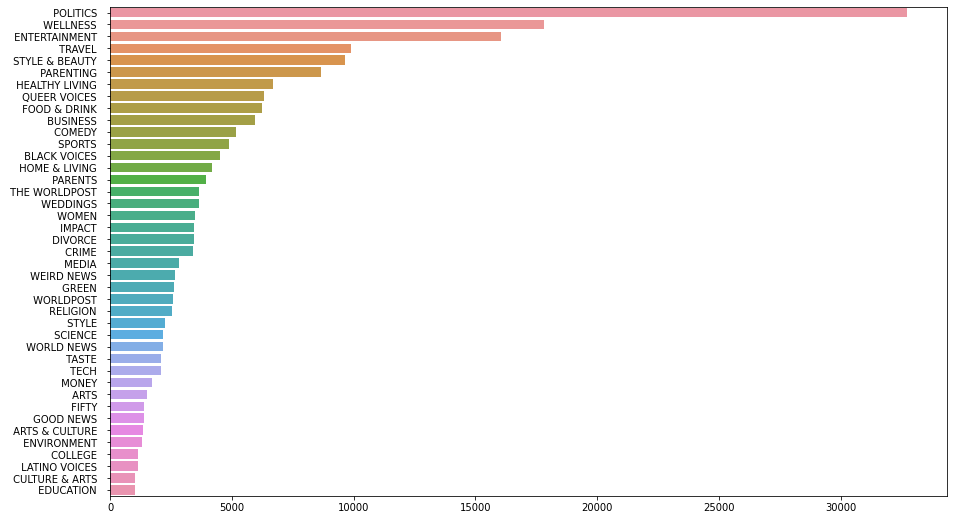

In [4]:
fig = plt.figure(figsize=(15,9))
sns.barplot(x = data['category'].value_counts().values,y=data['category'].value_counts().index)

In [5]:
df = data[['headline','category']]

In [6]:
df.head()

,headline,category
0,There Were 2 Mass Shootings In Texas Last Wee...,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The ...,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age ...,ENTERTAINMENT
3,Jim Carrey Blasts 'Castrato' Adam Schiff And ...,ENTERTAINMENT
4,Julianna Margulies Uses Donald Trump Poop Bag...,ENTERTAINMENT


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
x = np.array(df['headline'])
y = np.array(df['category'])

In [9]:
m = CountVectorizer()
x = m.fit_transform(x) 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size = 0.20)

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
model = MultinomialNB()
model.fit(xtrain,ytrain)

MultinomialNB()

In [14]:
df['headline'].loc[10]

' Justin Timberlake Visits Texas School Shooting Victims authors'

In [15]:
df['category'].loc[10]

' ENTERTAINMENT  '

In [16]:
input = 'Washington creates first statewide alert system for missing Indigenous people'
text = m.transform([input]).toarray()

In [17]:
model.predict(text)

array([' POLITICS  '], dtype='<U17')